<a href="https://colab.research.google.com/github/AlexNoonan-Syracuse/BigDataProject/blob/main/Macromodel_with_inputv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install quandl

# Reading in the Data


In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests as grangercausalitytests
import quandl
import requests
from bs4 import BeautifulSoup
import numpy as np





# reading in macro datacsv
df1 = pd.read_csv("https://raw.githubusercontent.com/AlexNoonan-Syracuse/BigDataProject/main/Macro%20Data.csv")

df1['DATE'] = df1['DATE'].apply(lambda x: datetime.datetime.strptime(str(x), "%m/%d/%Y"))
#df1.drop(columns=["Unnamed: 7", "% Change (M/M)", "%Change (Q/Q)", "% Change (Y/Y)", "% Change Q/Q", "DATE"], inplace =True )
df1['Year'] = pd.DatetimeIndex(df1['DATE']).year
df1['Month'] = pd.DatetimeIndex(df1['DATE']).month
# truncating data to be in a 50 year window
df1 = df1[df1['Year']>= 1950]

print(df1.info())
print(df1.head())

#df1 = df1.set_index(['DATE'], drop=True)
# pmi data from quandl
quandl.ApiConfig.api_key = "FxsNx9PisEsskkErUy4k"
df2 = quandl.get("ISM/MAN_PMI")

print(df2.info())
print(df2.head())

# treasury data
# webscrape of the Treasury's web page and creating a dataframe of the daily treasury history

url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll'

r = requests.get(url)
html = r.text
soup = BeautifulSoup(html)
table = soup.find('table', {"class": "t-chart"})
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df3 = pd.DataFrame(data, columns=['Date', 'One_Mo', 'Two_Mo', 'Three_Mo', 'Six_Mo', 'One_Yr', 'Two_Yr', 'Three_Yr', 'Five_Yr', 'Seven_Yr', 'Ten_Yr', 'Twenty_Yr', 'Thirty_Yr'])

df3.replace(to_replace='N/A', value=0, inplace=True)
df3 = df3.astype({'One_Mo':'float64', 'Two_Mo':'float64', 'Three_Mo':'float64', 'Six_Mo':'float64', 'One_Yr':'float64', 'Two_Yr':'float64', 'Three_Yr':'float64', 'Five_Yr':'float64', 'Seven_Yr':'float64', 'Ten_Yr':'float64', 'Twenty_Yr':'float64', 'Thirty_Yr':'float64'})
df3['Date'] = pd.to_datetime(df3['Date'], format="%m/%d/%y")
print(df3.info())
print(df3.head())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 36 to 893
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DATE                                  858 non-null    datetime64[ns]
 1   CPIAUCSL                              858 non-null    float64       
 2   CPI % Change (M/M)                    858 non-null    float64       
 3   CPI %Change (Q/Q)                     858 non-null    float64       
 4   CPI % Change (Y/Y)                    858 non-null    float64       
 5   Nominal GDP                           858 non-null    float64       
 6   Nominal% Change Q/Q                   858 non-null    float64       
 7   Total Business inventories            354 non-null    float64       
 8   Initial Claims (Seasonally Adjusted)  654 non-null    float64       
 9   DXY Open                              438 non-null    float64       
 10  D

In [4]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=85901fefb37df368368212416fe5ffee0faac06c73bf06b798c1bc6f04fd2cd1
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
indexes = []
for _ in range(1):
    index = input("Please enter the ticker symbol: ")
    indexes.append(index)

lowercased = [index.lower() for index in indexes]
titlecased = [index.title() for index in lowercased]
index_details = [
    f"The model will run for {index}" for name in titlecased]

for index_detail in index_details:
    print(index_detail)

Please enter the ticker symbol: GOOG
The model will run for GOOG


In [6]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
index_data = pdr.get_data_yahoo(indexes)
index_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200


In [7]:
index_data.reset_index(inplace=True)




In [8]:
index_table = index_data[["Date","Adj Close"]]
index_table

,Date,Adj Close
0,2004-08-19,49.982655
1,2004-08-20,53.952770
2,2004-08-23,54.495735
3,2004-08-24,52.239197
4,2004-08-25,52.802086
...,...,...
4289,2021-09-01,2916.840088
4290,2021-09-02,2884.379883
4291,2021-09-03,2895.500000
4292,2021-09-07,2910.379883


# Transforming and Merging The Econ Data

In [9]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
df2.index.normalize

# merging pmi data to econ data
dfmain = pd.merge(df1, df2, how='left', left_on='DATE', right_on='Date')

# transformations on treasury data
df3['TwoTenSpread'] = df3['Ten_Yr'] - df3['Two_Yr']

# monthly returns from daily returns
df3['TwoTenSpreadPctChange'] = df3['TwoTenSpread'].pct_change()
df3['DateMonth'] = df3['Date'].dt.to_period("M")
df4 = df3[['DateMonth','TwoTenSpread']]
df4['TwoTenMonthlyVariance'] = df4.groupby(['DateMonth']).transform(np.std)
df4 = df4[['DateMonth', 'TwoTenMonthlyVariance']]
df4 = df4.drop_duplicates()
df4.reset_index(inplace=True,drop='index')
df4['DateMonth'] = df4['DateMonth'].astype(str)
df4['Date'] = pd.to_datetime(df4['DateMonth'])
df4.drop(columns=['DateMonth'], inplace=True)
df4.set_index('Date', drop=True, inplace=True)

# merging 2/10 to main dataframe
dfmain = pd.merge(dfmain, df4, how='left', left_on='DATE', right_index=True)
dfmain.set_index('DATE', inplace=True)
#print(dfmain['Nominal GDP'].head(20))
# column transformations to attempt to get stationary values
dfmain['CpiAnnualizedPct'] = ((dfmain['CPIAUCSL']/dfmain['CPIAUCSL'].shift(1))**12-1)*100 
dfmain['GdpAnnualizedPct'] = ((dfmain['Nominal GDP']/dfmain['Nominal GDP'].shift(1))**12-1)*100

dfmain['GdpAnnualizedPct'] = dfmain['GdpAnnualizedPct'].rolling(window=6).mean()
dfmain['BopPct'] = dfmain['Balance of Payments Value'].pct_change()
dfmain['InventoriesPct'] = dfmain['Total Business inventories'].pct_change()
dfmain['WtiPct'] = dfmain['WTI SPOT Price']
print(dfmain['GdpAnnualizedPct'].tail(20))
# dropping columns
dfmain = dfmain.drop(columns=['CPIAUCSL', 'CPI % Change (M/M)','CPI %Change (Q/Q)'
                      ,'CPI % Change (Y/Y)', 'Nominal GDP', 'Nominal% Change Q/Q'
                      ,'DXY Open', 'DXY Low', 'DXY High', 'Balance of Payments Value'
                      ,'WTI SPOT Price', 'Vix Open', 'Vix Close', 'Total Business inventories'])

print(dfmain.columns)
print(dfmain.info())

DATE
2019-11-01     3.993458
2019-12-01     3.993458
2020-01-01    -0.011946
2020-02-01    -0.011946
2020-03-01    -0.011946
2020-04-01   -13.382181
2020-05-01   -13.382181
2020-06-01   -13.382181
2020-07-01    16.314272
2020-08-01    16.314272
2020-09-01    16.314272
2020-10-01    31.340961
2020-11-01    31.340961
2020-12-01    31.340961
2021-01-01     9.545558
2021-02-01     9.545558
2021-03-01     9.545558
2021-04-01    13.428508
2021-05-01    13.428508
2021-06-01    13.428508
Name: GdpAnnualizedPct, dtype: float64
Index(['Initial Claims (Seasonally Adjusted)', 'DXY Close', 'Vix High',
       'Vix Low', 'Year', 'Month', 'PMI', 'TwoTenMonthlyVariance',
       'CpiAnnualizedPct', 'GdpAnnualizedPct', 'BopPct', 'InventoriesPct',
       'WtiPct'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 858 entries, 1950-01-01 to 2021-06-01
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                    

# Functions For Lagged Correlations, Augmented Dicky Fuller Test, and ARIMA Modeling

In [10]:

def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

def ADFtest(dataframe, column):
  # takes in dataframe, and column name. subsets the dataframe,
  # checks for stationarity and plots series and autocorrelation in 5 year increments
  

  df = dataframe[column]
  df = df[df.notna()]
  print("ADF TEST:" + column)
  df = df.replace([np.inf, -np.inf], np.nan).dropna()
  result1 = adfuller(df)
  print('ADF Statistic: %f' % result1[0])
  print('p-value: %f' % result1[1])
  if result1[1] > 0.05:
    return print("This Series is not stable")
  else:
    fig, axis = plt.subplots(2, figsize = (9,9))
    axis[0].set_xlabel("Date")
    axis[0].set_ylabel(column)
    axis[0].set_title(column + " Over Time")
    df.plot(ax=axis[0], style='k-')
    plot_acf(df, ax=axis[1])
    plt.show()

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
# arima forecasting function

def ARIMA_modeling_and_forecast(df, column, diff):
  # Arima Model testing, fitting, and forecast 
  # function assumes a stationary time series is introduced

  # test train split 95% through
  splitIndex =  round(len(df)*0.95)
  traindf = df.iloc[0:round(len(df)*0.95)]
  traindf = traindf.replace([np.inf, -np.inf], np.nan).dropna()
  testdf = df.iloc[round(len(df)*0.95)+1:]
  testdf = testdf.replace([np.inf, -np.inf], np.nan).dropna()
  parameters = []
  for pindex in range(3):
      for qindex in range(6):
        p = pindex + 1 
        q = qindex + 1
        try:
          Model1 = ARIMA(traindf, order = (p,diff,q)).fit()
          param = {'AR': p, 'MA': q, 'AIC':Model1.aic} 
          parameters.append(param)
        except ValueError:
          pass


      #print('AR:', p , 'MA:', q, 'AIC:', Model1.aic)

    # finding best parameters
  modelparams = pd.DataFrame(parameters)
  try:
    bestparams = modelparams[modelparams['AIC'] == modelparams['AIC'].min()]
    try:
      Fitted_model = ARIMA(traindf
                         ,order = (int(bestparams.iloc[0]['AR'])
                         ,diff
                         ,int(bestparams.iloc[0]['MA']))).fit()
      print(bestparams)
    except ValueError:
      return print("Reject Model")
  except KeyError:
    pass
  # fitting best model
  
  
  # forecasting
  predictions = list()

  # walk-forward validation
  predictions = Fitted_model.forecast(steps=len(testdf))[0]
  predictionsdf = pd.DataFrame({'Date':testdf.index,'Predictions': predictions })
  predictionsdf.set_index('Date', inplace=True)

  # evaluate forecasts
  rmse = sqrt(mean_squared_error(testdf, predictions))
  predictionsdf['Lower RSME'] = predictionsdf - rmse
  predictionsdf['Higher RSME'] = predictionsdf['Predictions'] + rmse
  print("RSME:", rmse)
  
  # plot forecasts against actual outcomes
  #lt.title('Forecast for '+ column)
  plt.plot(testdf)
  plt.fill_between(predictionsdf.index,predictionsdf['Lower RSME'], predictionsdf['Higher RSME'], color='gray', alpha=0.2)
  plt.plot(predictionsdf['Predictions'], color='red')
  plt.show()
  returndf = pd.merge(predictionsdf, testdf, how='inner', left_index=True, right_index=True)
  print("------------------------------------------------------")
  return returndf, Fitted_model
  

# Results of Augmented Dickey Fuller tests and ARIMA Models

ADF TEST:Initial Claims (Seasonally Adjusted)
ADF Statistic: -6.194579
p-value: 0.000000


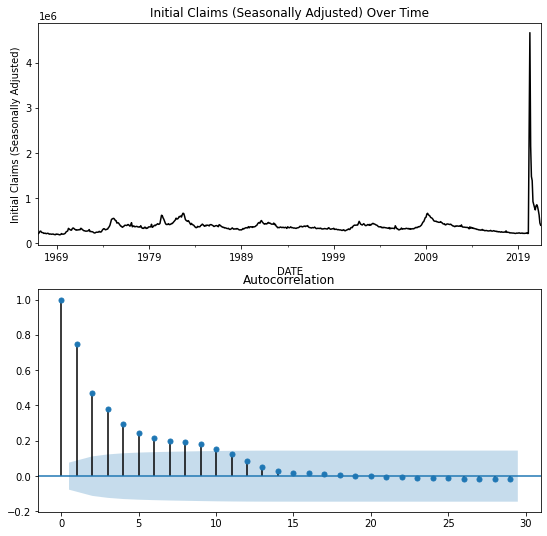

ADF TEST:DXY Close
ADF Statistic: -5.762013
p-value: 0.000001


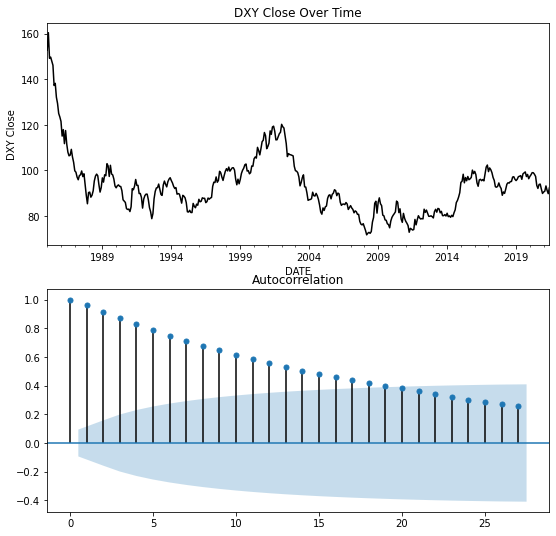

ADF TEST:Vix High
ADF Statistic: -4.798326
p-value: 0.000055


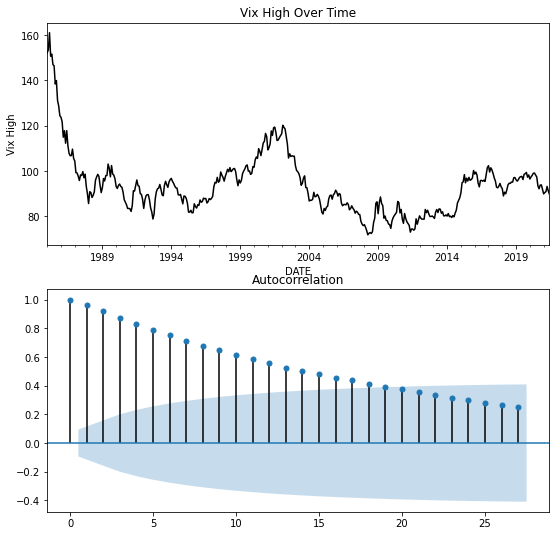

ADF TEST:Vix Low
ADF Statistic: -5.895472
p-value: 0.000000


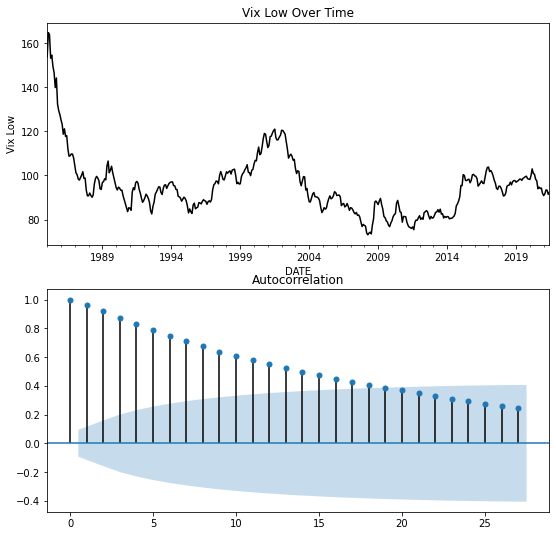

ADF TEST:Year
ADF Statistic: -0.109999
p-value: 0.948433
This Series is not stable
ADF TEST:PMI
ADF Statistic: -7.169164
p-value: 0.000000


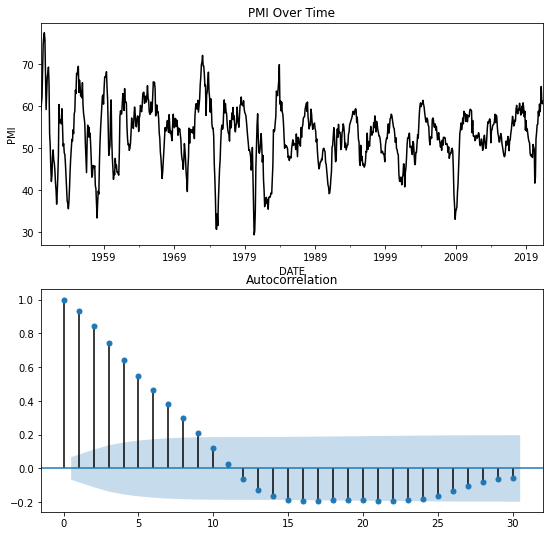

ADF TEST:TwoTenMonthlyVariance
ADF Statistic: -5.861827
p-value: 0.000000


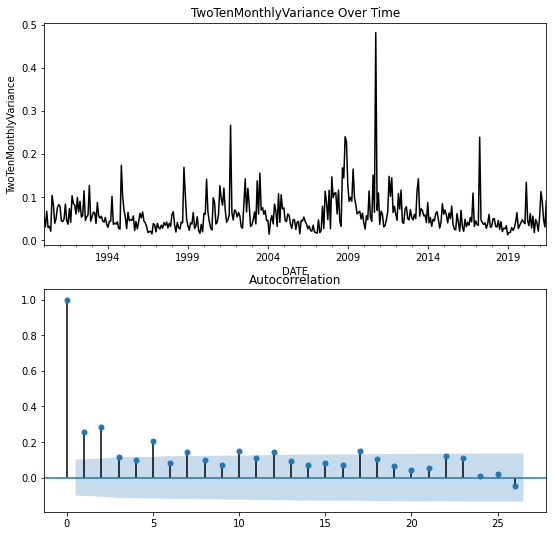

ADF TEST:CpiAnnualizedPct
ADF Statistic: -3.394541
p-value: 0.011146


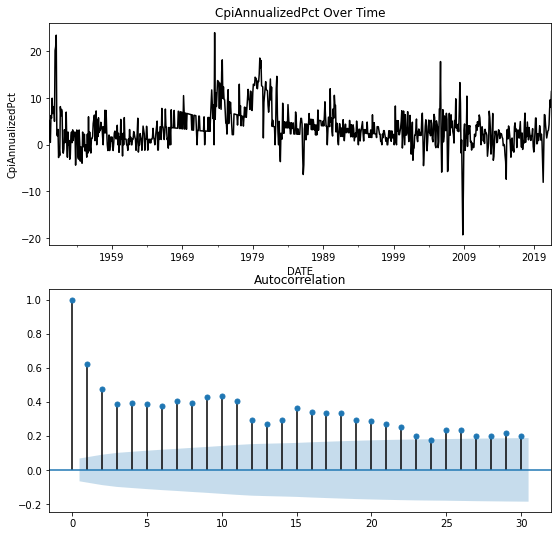

ADF TEST:GdpAnnualizedPct
ADF Statistic: -3.505054
p-value: 0.007858


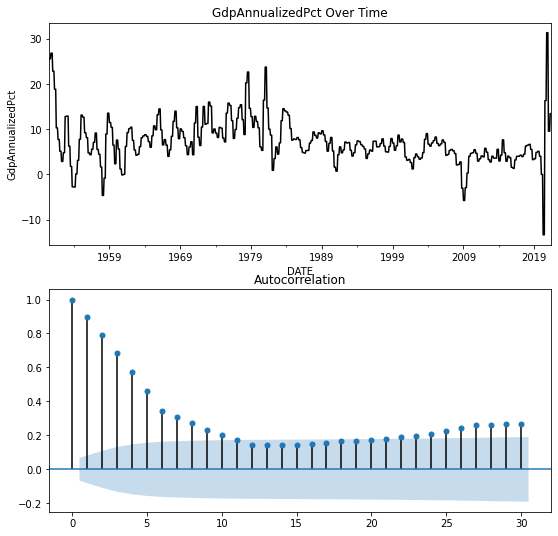

ADF TEST:BopPct
ADF Statistic: -20.627161
p-value: 0.000000


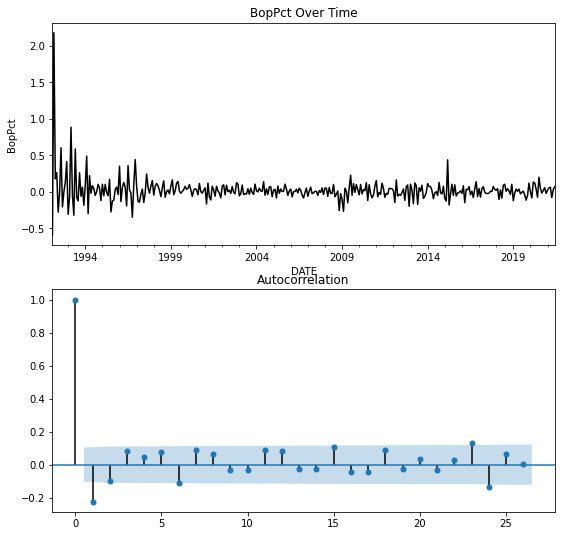

ADF TEST:InventoriesPct
ADF Statistic: -4.955661
p-value: 0.000027


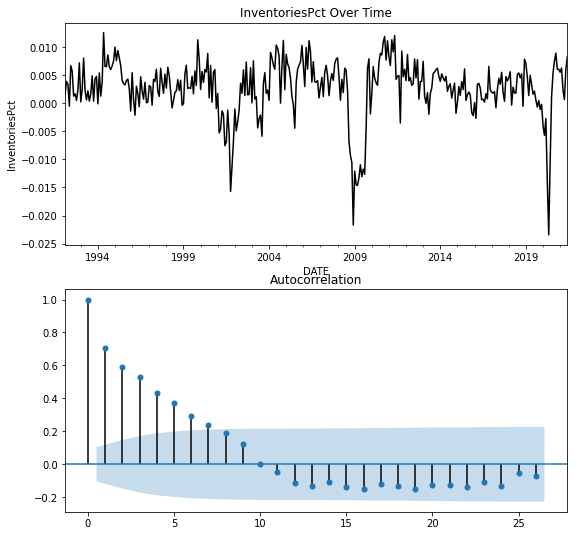

ADF TEST:WtiPct
ADF Statistic: -2.451469
p-value: 0.127733
This Series is not stable


In [13]:
for column in list(dfmain.columns):
  if column == 'Month':
    pass
  else:
    #looping through all the columns in the df
    ADFtest(dfmain, column)

# WTI is not stationary remove
dfmain.drop(columns='WtiPct', inplace=True)

Series:  Initial Claims (Seasonally Adjusted)
   AR  MA           AIC
8   3   2  13733.399067
RSME: 858540.6100229364


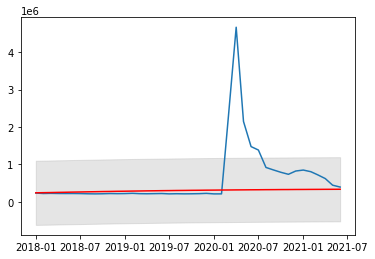

------------------------------------------------------
   AR  MA          AIC
2   2   2  13715.58645
RSME: 891935.22772104


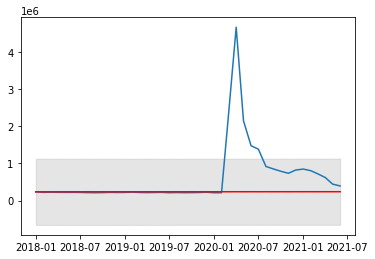

------------------------------------------------------
Series:  DXY Close
   AR  MA         AIC
1   1   2  1841.57258
RSME: 3.2737280119246965


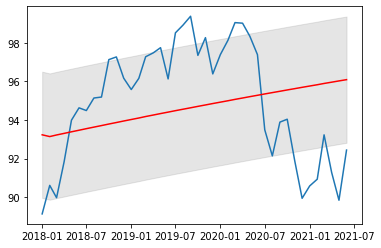

------------------------------------------------------
   AR  MA          AIC
0   2   1  1831.309863
RSME: 6.157926710703845


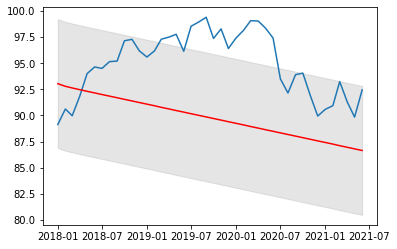

------------------------------------------------------
    AR  MA          AIC
12   3   4  1828.338706
RSME: 8.14770927822691


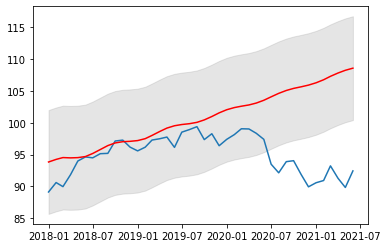

------------------------------------------------------
Series:  Vix High
   AR  MA          AIC
1   1   2  1842.574025
RSME: 3.4615024779891095


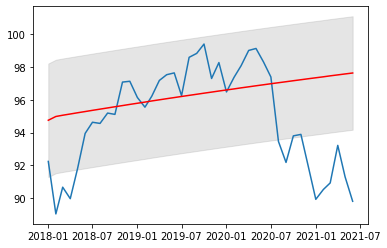

------------------------------------------------------
   AR  MA          AIC
1   2   1  1832.943936
RSME: 4.6286225184727074


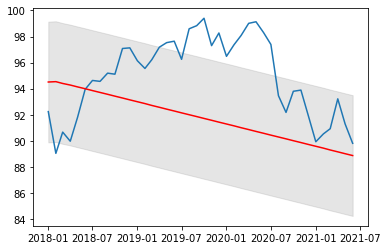

------------------------------------------------------
    AR  MA          AIC
10   2   5  1829.667763
RSME: 8.945001566023693


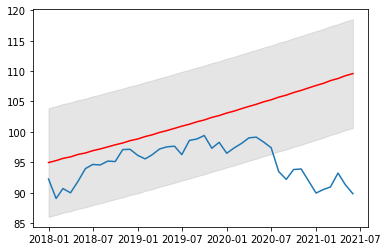

------------------------------------------------------
Series:  Vix Low
   AR  MA          AIC
3   1   4  1765.779214
RSME: 3.3583112222189198


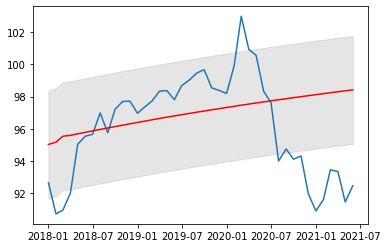

------------------------------------------------------
   AR  MA          AIC
2   2   2  1756.550086
RSME: 5.455637089805157


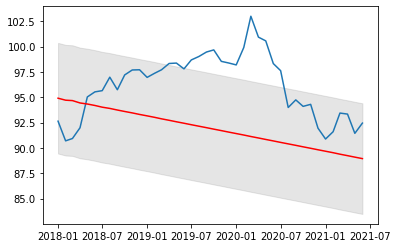

------------------------------------------------------
   AR  MA          AIC
7   2   3  1756.485566
RSME: 6.968802787203539


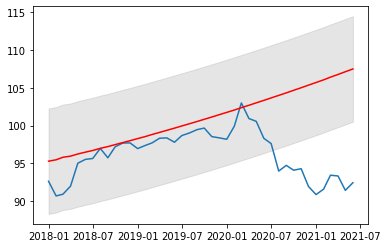

------------------------------------------------------
Series:  PMI
   AR  MA          AIC
2   1   3  3767.497624
RSME: 5.1267661963839055


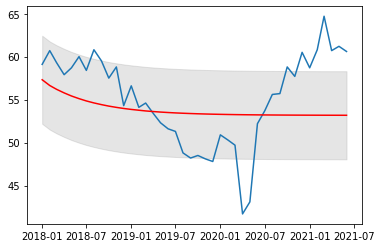

------------------------------------------------------
   AR  MA          AIC
2   1   4  3766.868583
RSME: 5.580588158162113


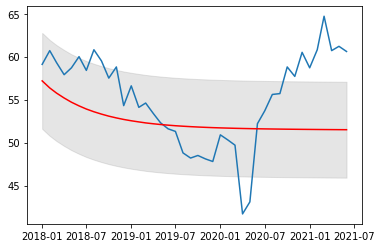

------------------------------------------------------
    AR  MA          AIC
16   3   5  3778.593061
RSME: 5.881578212259536


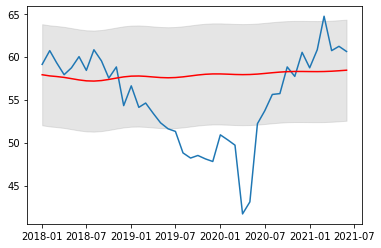

------------------------------------------------------
Series:  TwoTenMonthlyVariance
   AR  MA          AIC
5   3   2 -1175.838065
RSME: 0.031137409950835


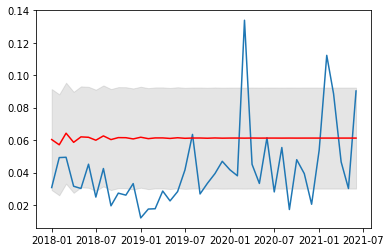

------------------------------------------------------
   AR  MA         AIC
8   2   4 -1168.83095
RSME: 0.027158560240501128


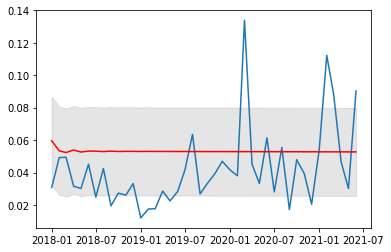

------------------------------------------------------
   AR  MA          AIC
0   1   5 -1143.785832
RSME: 0.02674432446078528


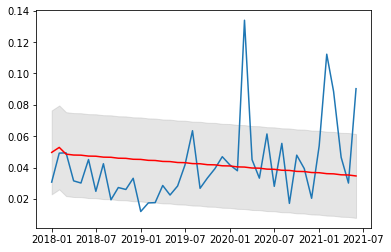

------------------------------------------------------
Series:  CpiAnnualizedPct
    AR  MA          AIC
16   3   5  4107.578187
RSME: 3.2998828278490775


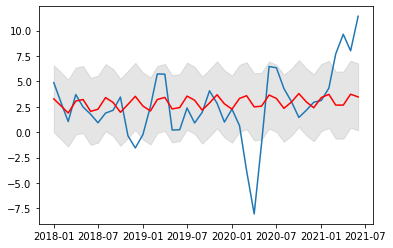

------------------------------------------------------
    AR  MA          AIC
10   2   5  4107.679546
RSME: 3.393144826338672


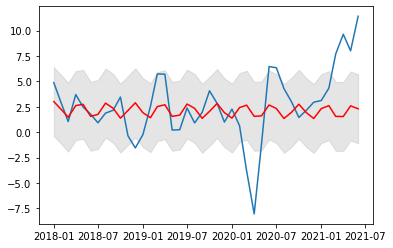

------------------------------------------------------
Series:  GdpAnnualizedPct
    AR  MA         AIC
16   3   5  2771.42172
RSME: 9.407017428220943


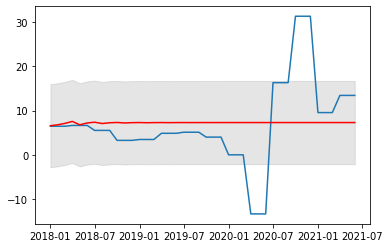

------------------------------------------------------
    AR  MA          AIC
17   3   6  2757.381613
RSME: 9.944684894836135


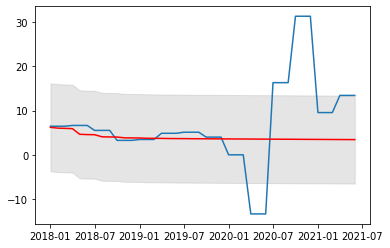

------------------------------------------------------
    AR  MA          AIC
13   3   4  2867.045656
RSME: 9.276912674250209


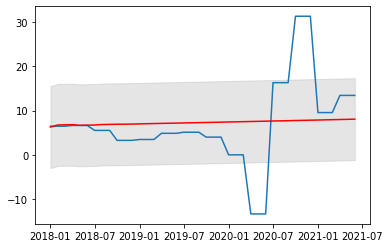

------------------------------------------------------
Series:  BopPct
   AR  MA         AIC
3   1   4 -207.221355
RSME: 0.07292133038640318


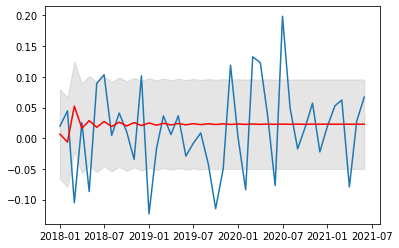

------------------------------------------------------
   AR  MA         AIC
0   1   3 -218.104466
RSME: 0.07959185360809812


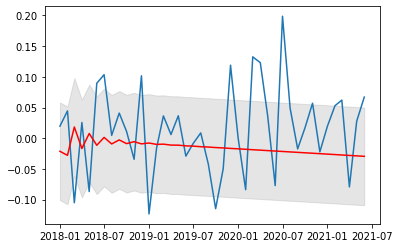

------------------------------------------------------
   AR  MA         AIC
1   1   4 -206.695176
RSME: 0.07829943187426087


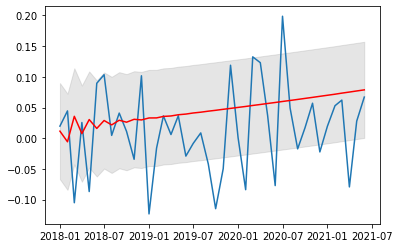

------------------------------------------------------
Series:  InventoriesPct
    AR  MA          AIC
10   3   3 -2653.874587
RSME: 0.006168561066923779


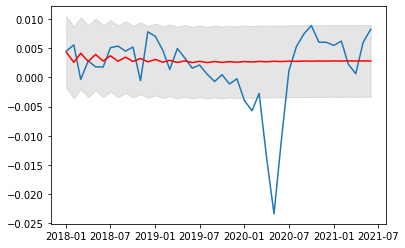

------------------------------------------------------
    AR  MA          AIC
12   3   3 -2634.497495
RSME: 0.006155102521342884


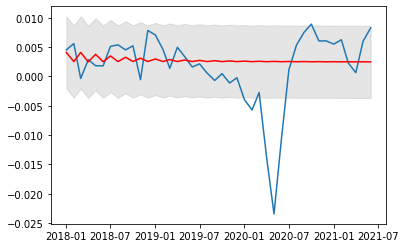

------------------------------------------------------
   AR  MA         AIC
0   1   3 -2607.18206
RSME: 0.006452361377841797


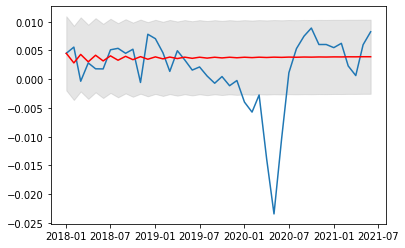

------------------------------------------------------


In [14]:
for column  in list(dfmain.columns):
  if (column == 'Year') | (column == 'Month') | (column =='WtiPct'):
    pass
  else:
    subsetdf = dfmain[column]
    print("Series: ", column)
    # looping through various differencings
    ARIMA_modeling_and_forecast(subsetdf, column, 0)
    ARIMA_modeling_and_forecast(subsetdf, column, 1)
    if (column == 'CpiAnnualizedPct') |(column =='Initial Claims (Seasonally Adjusted)'):
      pass
    else:
      ARIMA_modeling_and_forecast(subsetdf, column, 2)



# Correlation Analysis of Econ Data vs. Return Data

In [15]:
# GDP vs CPI
def assign_quads(row):
  if row['GdpAnnualizedPct'] > 0 and row['CpiAnnualizedPct'] <= 0:
    return 'Q1'
  elif row['GdpAnnualizedPct'] > 0 and row['CpiAnnualizedPct'] > 0:
    return 'Q2'
  elif row['GdpAnnualizedPct'] <= 0 and row['CpiAnnualizedPct'] > 0:
    return 'Q3'
  else:
    return 'Q4'

# PMI vs CPI
def assign_quads2(row):
  if row['PMI'] > 50 and row['CpiAnnualizedPct'] <= 0:
    return 'Q1'
  elif row['PMI'] > 50 and row['CpiAnnualizedPct'] > 0:
    return 'Q2'
  elif row['PMI'] <= 50 and row['CpiAnnualizedPct'] > 0:
    return 'Q3'
  else:
    return 'Q4'

In [16]:
def forward_returns(df, column):
  # calculates 3 period and 6 period forward returns
  
  # need standard deviation for same periods

  # 3 month forward return
  indexer3 = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
  df[column+'forward3'] =df[column].rolling(window=indexer3).agg(lambda x: x.prod()-1)
  # 6 month forward return
  indexer6 = pd.api.indexers.FixedForwardWindowIndexer(window_size=6)

  df[column+'forward6'] =df[column].rolling(window=indexer6).agg(lambda x: x.prod()-1)
  return df

# Reading in S&P500 Return data and Quad Return Profile

In [17]:
#index_data = pd.read_excel("https://raw.githubusercontent.com/AlexNoonan-Syracuse/BigDataProject/main/Index%20Sectors.xlsx", skiprows=2)
#index_data = index_data[0:611]
#index_data.index = pd.to_datetime(index_data['Period Ending'])+ timedelta(days=1)
##del index_data['Period Ending']
#index_data = index_data["1990-01-01":"02-01-2021"]
#index_data.head()
#print(index_data.columns)
spy = index_table
spy.rename(columns={'Adj Close':'Spy'}, inplace=True)
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Month'] = spy['Date'].dt.to_period("M")
spy['Year'] = spy['Date'].dt.to_period("Y")
spy.set_index('Date', drop=True, inplace=True)
spy['spyPct'] = spy['Spy']/100

spy['spyPct'] = spy['spyPct']+1
spy = forward_returns(spy,'spyPct')

print(spy.head(10))

                  Spy    Month  Year    spyPct  spyPctforward3  spyPctforward6
Date                                                                          
2004-08-19  49.982655  2004-08  2004  1.499827        2.567344       11.759271
2004-08-20  53.952770  2004-08  2004  1.539528        2.621016       12.005481
2004-08-23  54.495735  2004-08  2004  1.544957        2.593952       11.740372
2004-08-24  52.239197  2004-08  2004  1.522392        2.576686       11.451593
2004-08-25  52.802086  2004-08  2004  1.528021        2.591666       11.263364
2004-08-26  53.753517  2004-08  2004  1.537535        2.544948       11.083861
2004-08-27  52.876804  2004-08  2004  1.528768        2.481321       10.774580
2004-08-30  50.814533  2004-08  2004  1.508145        2.414394       10.599246
2004-08-31  50.993862  2004-08  2004  1.509939        2.408756       10.610357
2004-09-01  49.937820  2004-09  2004  1.499378        2.382216       10.608059


In [46]:
index_data2 = pd.read_excel("https://raw.githubusercontent.com/AlexNoonan-Syracuse/BigDataProject/main/Index%20Sectors.xlsx", skiprows=2)
index_data2 = index_data2[0:611]
#index_data.index = pd.to_datetime(index_data['Period Ending'])+ timedelta(days=1)
##del index_data['Period Ending']
#index_data = index_data["1990-01-01":"02-01-2021"]
#index_data.head()
#print(index_data.columns)



In [51]:
spy2 = pd.melt(index_data2, id_vars=["Period Ending"], 
                  var_name="Index", value_name="Value")

spy2.rename(columns={'Period Ending':'Date','Value':'Spy'}, inplace=True)
spy2['Date'] = pd.to_datetime(spy2['Date'])
spy2['Month'] = spy2['Date'].dt.to_period("M")
spy2['Year'] = spy2['Date'].dt.to_period("Y")
spy2.set_index('Date', drop=True, inplace=True)
spy2['spyPct'] = spy2['Spy']/100

spy2['spyPct'] = spy2['spyPct']+1
spy2 = forward_returns(spy2,'spyPct')

spy2.head(10)


,Index,Spy,Month,Year,spyPct,spyPctforward3,spyPctforward6
Date,,,,,,,
1970-07-31,S&P - 500 Index,7.687019,1970-07,1970,1.076870,0.169165,0.290858
1970-08-31,S&P - 500 Index,4.778988,1970-08,1970,1.047790,0.076682,0.250486
1970-09-30,S&P - 500 Index,3.618744,1970-09,1970,1.036187,0.079539,0.207392
1970-10-31,S&P - 500 Index,-0.831255,1970-10,1970,0.991687,0.104085,0.211112
1970-11-30,S&P - 500 Index,5.057057,1970-11,1970,1.050571,0.161425,0.268745
1970-12-31,S&P - 500 Index,5.974771,1970-12,1970,1.059748,0.118433,0.160504
1971-01-31,S&P - 500 Index,4.319045,1971-01,1971,1.043190,0.096937,0.098703
1971-02-28,S&P - 500 Index,1.168127,1971-02,1971,1.011681,0.092404,0.012438
1971-03-31,S&P - 500 Index,3.937984,1971-03,1971,1.039380,0.037617,0.039593


# Macro Model 1 Annualized GDP vs CPI


No handles with labels found to put in legend.


            CpiAnnualizedPct  GdpAnnualizedPct Quads
DATE                                                
1950-12-01         20.195421         26.187881    Q2
1951-01-01         21.001347         25.730146    Q2
1951-02-01         23.479102         25.272412    Q2
1951-03-01          2.347771         24.814677    Q2
1951-04-01          1.870562         23.484415    Q2
1951-05-01          3.289313         22.154153    Q2
1951-06-01         -2.735391         20.823891    Q1
1951-07-01         -0.921652         18.734559    Q1
1951-08-01         -2.291287         16.645228    Q1
1951-09-01          8.180198         14.555897    Q2


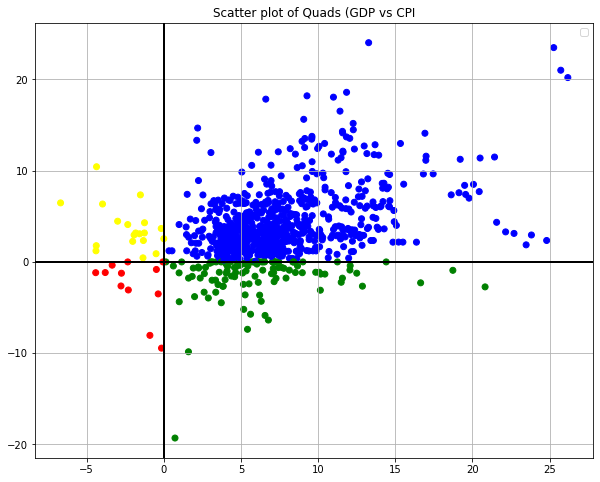

In [18]:
cpiGdp = dfmain[['CpiAnnualizedPct', 'GdpAnnualizedPct']]
cpiGdp['GdpAnnualizedPct'] = cpiGdp['GdpAnnualizedPct'].rolling(window=6).mean()
cpiGdp.dropna(inplace=True)
cpiGdp['Quads'] = cpiGdp.apply(lambda row: assign_quads(row) ,axis=1 )
print(cpiGdp.head(10))
colors = {'Q1':'green', 'Q2':'blue', 'Q3':'yellow', 'Q4':'red'}

fig, (ax) = plt.subplots(1, figsize=(10,8))
ax.set_title('Scatter plot of Quads (GDP vs CPI')
ax.scatter(cpiGdp['GdpAnnualizedPct'], cpiGdp['CpiAnnualizedPct'],c=cpiGdp['Quads'].map(colors) )
ax.grid()
plt.axvline(x=0, linewidth=2, color='k')
plt.axhline(y=0, linewidth=2, color='k')
plt.legend()
plt.show()

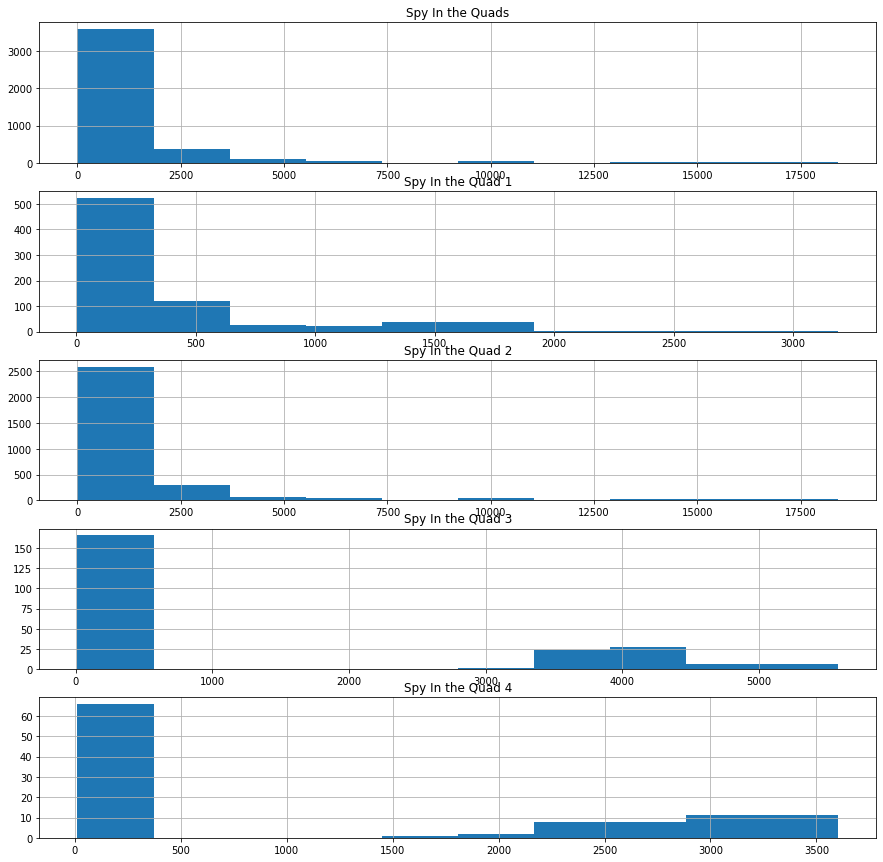

,spyPctforward3,spyPctforward6
Quads,,
Q1,378.016764,4.209896e+05
Q2,1152.195686,8.511135e+06
Q3,1179.062492,4.928957e+06
Q4,1106.280956,3.340940e+06


In [19]:
# Model 1 analysis of forward returns based on quads


cpiGdp['Month'] = cpiGdp.index.to_period("M")
spyPlots = pd.merge(cpiGdp, spy,how='inner', left_on='Month', right_on='Month')

spyPlotsQ1 = spyPlots[spyPlots['Quads']=='Q1']
spyPlotsQ2 = spyPlots[spyPlots['Quads']=='Q2']
spyPlotsQ3 = spyPlots[spyPlots['Quads']=='Q3']
spyPlotsQ4 = spyPlots[spyPlots['Quads']=='Q4']
fig, (axs) = plt.subplots(5, figsize=(15,15))
axs[0].set_title('Spy In the Quads')
axs[0].hist(spyPlots['spyPctforward3'])
axs[0].grid()
#axs[0].legend()
axs[1].set_title('Spy In the Quad 1')
axs[1].hist(spyPlotsQ1['spyPctforward3'])
axs[1].grid()
#axs[1].legend()
axs[2].set_title('Spy In the Quad 2')
axs[2].hist(spyPlotsQ2['spyPctforward3'])
axs[2].grid()
#axs[2].legend()
axs[3].set_title('Spy In the Quad 3')
axs[3].hist(spyPlotsQ3['spyPctforward3'])
axs[3].grid()
#axs[3].legend()
axs[4].set_title('Spy In the Quad 4')
axs[4].hist(spyPlotsQ4['spyPctforward3'])
axs[4].grid()
#axs[4].legend()
plt.show()

# pivot table of average forward returns per quads
SpyPivot = pd.pivot_table(spyPlots, values=['spyPctforward3', 'spyPctforward6'], index=spyPlots['Quads'],aggfunc=np.mean)
SpyPivot.head()

# Macro Model 2 PMI vs Annualized CPI



No handles with labels found to put in legend.


             PMI  CpiAnnualizedPct
DATE                              
1950-02-01  60.5          5.225330
1950-03-01  62.1          1.535479
1950-04-01  68.1          0.508797
1950-05-01  74.7          6.261622
1950-06-01  76.6          5.696763


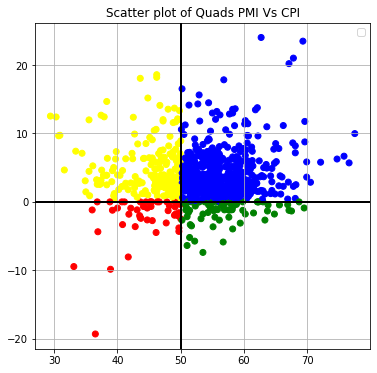

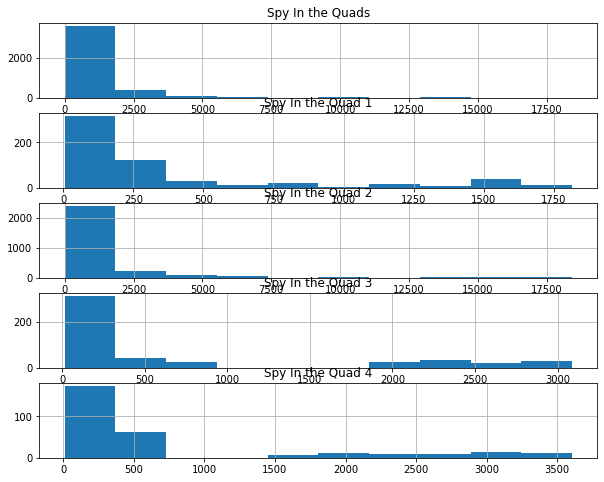

,spyPctforward3,spyPctforward6
Quads,,
Q1,352.005961,3.646824e+05
Q2,1236.836776,9.400201e+06
Q3,658.981187,1.478411e+06
Q4,692.768788,1.587986e+06


In [20]:



macrogrid2 = dfmain[['PMI','CpiAnnualizedPct']]
macrogrid2.dropna(inplace=True)
print(macrogrid2.head())
macrogrid2['Quads'] = macrogrid2.apply(lambda row: assign_quads2(row), axis=1)

macrogrid2['Month'] = macrogrid2.index.to_period("M")
spyPlots2 = pd.merge(macrogrid2, spy, how='inner', on='Month')

colors = {'Q1':'green', 'Q2':'blue', 'Q3':'yellow', 'Q4':'red'}

fig, (ax) = plt.subplots(1, figsize=(6,6))
ax.set_title('Scatter plot of Quads PMI Vs CPI')
ax.scatter(macrogrid2['PMI'], macrogrid2['CpiAnnualizedPct'],c=macrogrid2['Quads'].map(colors) )
ax.grid()
plt.axvline(x=50, linewidth=2, color='k')
plt.axhline(y=0, linewidth=2, color='k')
plt.legend()
plt.show()

spyPlots2Q1 = spyPlots2[spyPlots2['Quads']=='Q1']
spyPlots2Q2 = spyPlots2[spyPlots2['Quads']=='Q2']
spyPlots2Q3 = spyPlots2[spyPlots2['Quads']=='Q3']
spyPlots2Q4 = spyPlots2[spyPlots2['Quads']=='Q4']
fig, (axs) = plt.subplots(5, figsize=(10,8))
axs[0].set_title('Spy In the Quads')
axs[0].hist(spyPlots2['spyPctforward3'])
axs[0].grid()
#axs[0].legend()
axs[1].set_title('Spy In the Quad 1')
axs[1].hist(spyPlots2Q1['spyPctforward3'])
axs[1].grid()
#axs[1].legend()
axs[2].set_title('Spy In the Quad 2')
axs[2].hist(spyPlots2Q2['spyPctforward3'])
axs[2].grid()
#axs[2].legend()
axs[3].set_title('Spy In the Quad 3')
axs[3].hist(spyPlots2Q3['spyPctforward3'])
axs[3].grid()
#axs[3].legend()
axs[4].set_title('Spy In the Quad 4')
axs[4].hist(spyPlots2Q4['spyPctforward3'])
axs[4].grid()
#axs[4].legend()
plt.show()

SpyPivot2 = pd.pivot_table(spyPlots2, values=['spyPctforward3', 'spyPctforward6'], index=spyPlots2['Quads'],aggfunc=np.mean)
SpyPivot2.head()

# Final Econ Forecast

Series:  CpiAnnualizedPct
    AR  MA          AIC
16   3   5  4107.578187
RSME: 3.2998828278490775


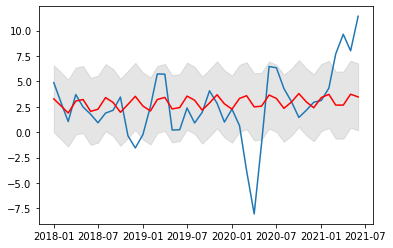

------------------------------------------------------
Series:  PMI
   AR  MA          AIC
2   1   3  3767.497624
RSME: 5.1267661963839055


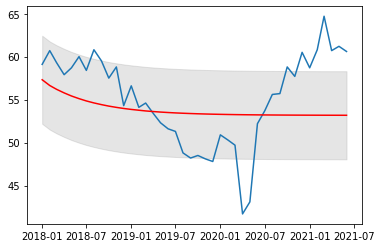

------------------------------------------------------
       Month  CpiAnnualizedPct        PMI QuadsForecast
0     August          3.281865  57.312348            Q2
1  September          2.560893  56.641162            Q2
2    October          1.885058  56.197732            Q2
3   November          3.064539  55.781301            Q2
4   December          3.216743  55.422108            Q2


In [21]:
#CPI 6 Month Forecast
cpiDf = dfmain['CpiAnnualizedPct']
print("Series: ", 'CpiAnnualizedPct')
modeldf, CPIModel =ARIMA_modeling_and_forecast(cpiDf,'CpiAnnualizedPct',0)

# PMI 6 Month Forecast
pmiDf = dfmain['PMI']
print("Series: ", 'PMI')
modeldf, pmiModel =ARIMA_modeling_and_forecast(pmiDf,'PMI',0)

# 6 month forecast and final analysis dataframe
nextSixMonths = ['August', 'September', 'October', 'November', 'December', 'January']

cpiPredictions = CPIModel.forecast(steps=6)[0]

pmiPredicitions = pmiModel.forecast(steps=6)[0]

finalPredictionsdf = pd.DataFrame({'Month':nextSixMonths,'CpiAnnualizedPct': cpiPredictions, 'PMI':pmiPredicitions })
finalPredictionsdf['QuadsForecast'] = finalPredictionsdf.apply(lambda row: assign_quads2(row), axis=1)
print(finalPredictionsdf.head())


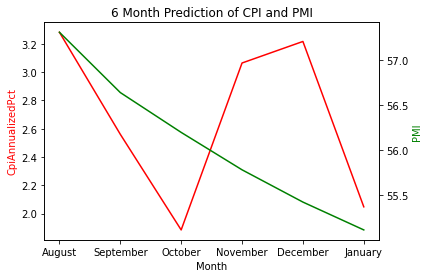

,Month,CpiAnnualizedPct,PMI,QuadsForecast
0,August,3.281865,57.312348,Q2
1,September,2.560893,56.641162,Q2
2,October,1.885058,56.197732,Q2
3,November,3.064539,55.781301,Q2
4,December,3.216743,55.422108,Q2
5,January,2.048265,55.112283,Q2


In [ ]:
# Forecast plot

fig, ax = plt.subplots()
plt.title("6 Month Prediction of CPI and PMI")
ax.plot(finalPredictionsdf['CpiAnnualizedPct'], label= 'CPI Forecast', color='Red')
ax.set_xlabel("Month")
ax.set_ylabel("CpiAnnualizedPct", color='Red')
ax2=ax.twinx()
ax2.plot(finalPredictionsdf['PMI'], label = 'PMI Forecast', color='Green')
ax2.set_ylabel("PMI", color='green')
ax.set_xticks(finalPredictionsdf.index)
ax.set_xticklabels(nextSixMonths)
plt.show()
finalPredictionsdf.head(7)

In [ ]:
nextSixMonths = ['August', 'September', 'October', 'November', 'December', 'January']

cpiPredictions = CPIModel.forecast(steps=6)[0]

pmiPredicitions = pmiModel.forecast(steps=6)[0]

finalPredictionsdf = pd.DataFrame({'Month':nextSixMonths,'CpiAnnualizedPct': cpiPredictions, 'PMI':pmiPredicitions })
finalPredictionsdf['QuadsForecast'] = finalPredictionsdf.apply(lambda row: assign_quads2(row), axis=1)
print(finalPredictionsdf.head())


       Month  CpiAnnualizedPct        PMI QuadsForecast
0     August          3.281865  57.312348            Q2
1  September          2.560893  56.641162            Q2
2    October          1.885058  56.197732            Q2
3   November          3.064539  55.781301            Q2
4   December          3.216743  55.422108            Q2
